<a href="https://colab.research.google.com/github/Ziaeemehr/signal_processing/blob/main/src/intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
from scipy import signal 
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

In [3]:
def fft(ts, fs):
    """ This functions computes the fft of a signal.

    Parameters
    ----------
    signal : nd-array [n_regions, n_timepoints]
        The input signal from which fft is computed
    fs : float
        Sampling frequency

    Returns
    -------
    f: nd-array
        Frequency values (xx axis)
    fmag: nd-array [n_regions, n_freqs]
        Amplitude of the frequency values (yy axis)

    """
    if len(ts.shape) == 1:
        ts = ts[np.newaxis, :]

    fmag = np.abs(np.fft.rfft(ts, axis=1))
    f = np.fft.rfftfreq(len(ts[0]), d=1/fs)

    return f, fmag

def welch(ts, fs, nperseg=256):
    """ 
    This functions computes the power spectrum of a signal using Welch's method.

    Parameters
    ----------
    signal : nd-array [n_regions, n_timepoints]
        The input signal from which fft is computed
    fs : float
        Sampling frequency
    nperseg : int
        Length of each segment

    Returns
    -------
    f: nd-array
        Frequency values (xx axis)
    fmag: nd-array [n_regions, n_freqs]
        Amplitude of the frequency values (yy axis)

    """

    if len(ts.shape) == 1:
        ts = ts[np.newaxis, :]

    f, fmag = signal.welch(ts, fs, nperseg=nperseg, axis=1)

    return f, fmag

def make_signal(fs, dur, freqs, amps, phases, noise=0.0):
    """ 
    This functions generates a signal with multiple frequencies.

    Parameters
    ----------
    fs : float
        Sampling frequency
    dur : float
        Duration of the signal
    freqs : list
        List of frequencies
    amps : list
        List of amplitudes
    phases : list
        List of phases

    Returns
    -------
    signal : nd-array [n_regions, n_timepoints]
        The generated signal

    """
    t = np.arange(0, dur, 1/fs)
    signal = np.zeros(len(t))
    for i in range(len(freqs)):
        signal += amps[i] * np.sin(2*np.pi*freqs[i]*t + phases[i])
    signal += noise * np.random.randn(len(t))

    return t, signal
    

(0.0, 10.0)

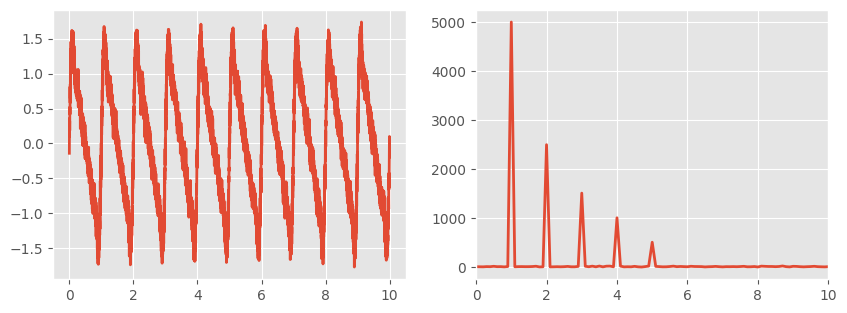

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10,3.5))

fs = 1000 # Hz
dur = 10 # seconds
freqs = [1, 2, 3, 4, 5]
amps = [1, 0.5, 0.3, 0.2, 0.1]
phases = [0, 0, 0, 0, 0]
t, ts = make_signal(fs, dur, freqs, amps, phases, noise=0.1)


f, fmag = fft(ts, fs)
ax[0].plot(t, ts, lw=2)
ax[1].plot(f, fmag[0], lw=2)
ax[1].set_xlim([0, 10])


(0.0, 10.0)

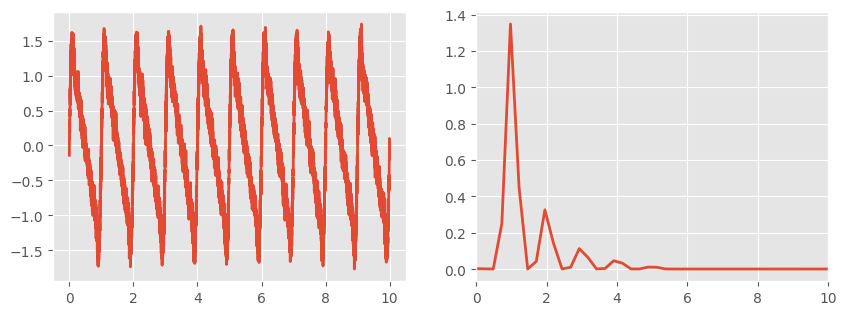

In [14]:
fig, ax = plt.subplots(1,2, figsize=(10,3.5))

f, fmag = welch(ts, fs, nperseg=4096)
ax[0].plot(t, ts, lw=2)
ax[1].plot(f, fmag[0], lw=2)
ax[1].set_xlim([0, 10])
